In [1]:
# Loading the dataset

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# Download mnist and split the data into train and test 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

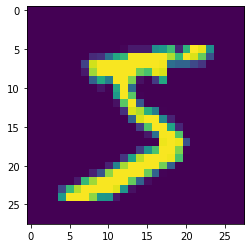

In [3]:
# Taking a quick look at the data.

plt.imshow(x_train[0])

In [4]:
y_train[0]

5

In [5]:
# Input data shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
x_train = x_train/256
x_test = x_test/256

In [0]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
# One hot encoding the target variable

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Check the encoding done.

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Creating a simple CNN.

from keras.models import Sequential # Allows to build a model layer by layer.
from keras.layers import Conv2D, Dense, Flatten

# Sequential model initialization
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 64 filters, Filter_size 3, activation = relu (to add non-linearity)
model.add(Conv2D(32, kernel_size=3, activation='relu')) # 64 filters, Filter_size 3, activation = relu (to add non-linearity)
model.add(Flatten()) # Flatten Layer
model.add(Dense(10, activation= 'softmax'))





In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/4





60000/60000 [==============================] - 10s 172us/step - loss: 0.1264 - acc: 0.9628 - val_loss: 0.0519 - val_acc: 0.9836
Epoch 2/4
60000/60000 [==============================] - 8s 135us/step - loss: 0.0471 - acc: 0.9859 - val_loss: 0.0485 - val_acc: 0.9850
Epoch 3/4
60000/60000 [==============================] - 8s 133us/step - loss: 0.0310 - acc: 0.9900 - val_loss: 0.0472 - val_acc: 0.9845
Epoch 4/4
60000/60000 [==============================] - 8s 136us/step - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0571 - val_acc: 0.9847


In [13]:
#predict first 4 images in the test set
model.predict(x_test[:4])

array([[4.40599510e-12, 7.23062539e-12, 3.52150700e-08, 4.65843686e-06,
        6.95016707e-15, 4.84219652e-12, 6.58906033e-20, 9.99995351e-01,
        4.17488162e-11, 3.45359763e-09],
       [1.46198458e-08, 4.12323731e-09, 1.00000000e+00, 2.37565800e-11,
        3.02631624e-14, 4.51809983e-14, 9.36737887e-09, 6.53294405e-15,
        7.81180898e-09, 1.29037433e-15],
       [4.44683534e-09, 9.99929667e-01, 6.91380001e-06, 1.88915443e-08,
        3.41120212e-05, 1.03156296e-07, 1.14947252e-08, 2.93265231e-07,
        2.88181072e-05, 5.89507865e-09],
       [9.99999762e-01, 5.72631406e-13, 6.40074447e-08, 1.66093105e-13,
        4.27913699e-13, 7.03350989e-10, 7.45386899e-08, 3.22756509e-11,
        1.30187665e-08, 1.44875987e-08]], dtype=float32)